In [1]:
import pandas as pd
import seaborn as sns
import rdkit.Chem as Chem
import rdkit.Chem.QED as QED
from rdkit.Chem.rdMolDescriptors import CalcFractionCSP3

sns.set(rc={'figure.figsize': (10, 8)})
sns.set_style('white')

In [2]:
path_train = 'data/train_data/big_dataset_std_train_90.parquet'
path0 = 'results/SVC_lolek_150_18-28-52/preds_20230927-095252/predictions.csv'
path1 = 'results/SVC_bolek_150_15-20-21/preds_20230927-082101/predictions.csv'

In [3]:
df0 = pd.read_csv(path0)
df0['model'] = 'lolek'
df1 = pd.read_csv(path1)
df1['model'] = 'bolek'

df = pd.read_parquet(path_train)
df.drop(columns = ['fps'], inplace=True)
df['mol'] = df['smiles'].apply(Chem.MolFromSmiles)
df.head()

,smiles,mol
index,,
1,Cc1nc2c(c(C)c1CC(=O)NCc1ccco1)c(=O)[nH]n2C,<rdkit.Chem.rdchem.Mol object at 0x7f0304a51700>
2,O=C(c1csnn1)N1CCCC2(CCN(c3ncccn3)C2)C1,<rdkit.Chem.rdchem.Mol object at 0x7f0304a51820>
3,CCC(C(=O)NCc1ccco1)n1nc(C)c2c(C)n(-c3ccc(C)cc3...,<rdkit.Chem.rdchem.Mol object at 0x7f0304a51ee0>
4,O=S(=O)(NCc1ccc2c(c1)OCO2)c1c[nH]cn1,<rdkit.Chem.rdchem.Mol object at 0x7f0304a518e0>
5,O=C(c1cc(O)nc2ccccc12)N1CCN(c2cccc(C(F)(F)F)c2...,<rdkit.Chem.rdchem.Mol object at 0x7f0304a51e80>


In [ ]:
df['num_HBA'] = df['mol'].apply(Chem.rdMolDescriptors.CalcNumHBA)
sns.displot(df, x='num_HBA', binwidth=1, stat='proportion', kde=True, kde_kws={'bw_adjust': 1.5})

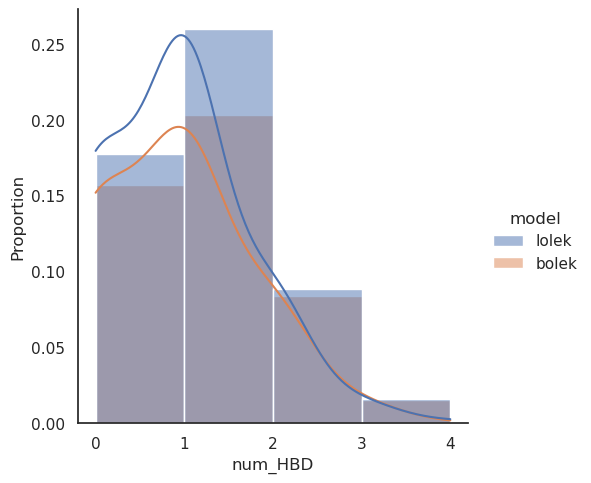

In [130]:
df['num_HBD'] = df['mol'].apply(Chem.rdMolDescriptors.CalcNumHBD)
sns.displot(df, x='num_HBD', binwidth=1, stat='proportion', kde=True, kde_kws={'bw_adjust': 2.5})

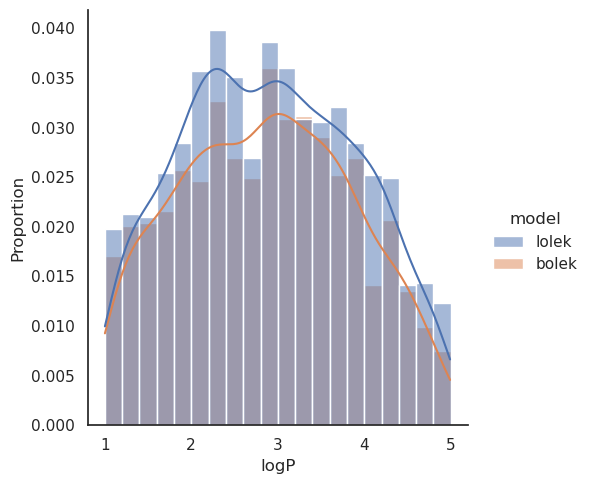

In [131]:
df['logP'] = df['mol'].apply(Chem.rdMolDescriptors.CalcCrippenDescriptors).apply(lambda x: x[0])
sns.displot(df, x='logP', binwidth=0.2, stat='proportion', kde=True, kde_kws={'bw_adjust': 1})

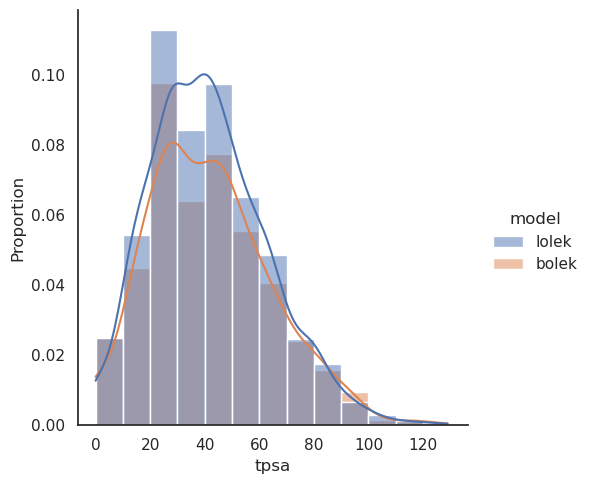

In [132]:
df['tpsa'] = df['mol'].apply(Chem.rdMolDescriptors.CalcTPSA)
sns.displot(df, x='tpsa', binwidth=10, stat='proportion', kde=True, kde_kws={'bw_adjust': 1})

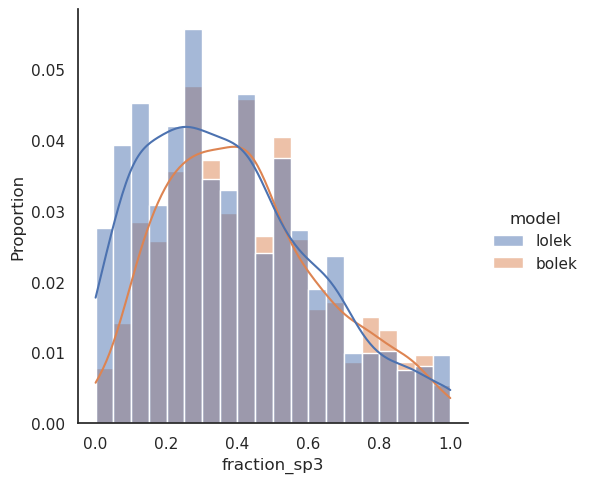

In [133]:
df['fraction_sp3'] = df['mol'].apply(CalcFractionCSP3)
sns.displot(df, x='fraction_sp3', binwidth=0.05, stat='proportion', kde=True, kde_kws={'bw_adjust': 1})

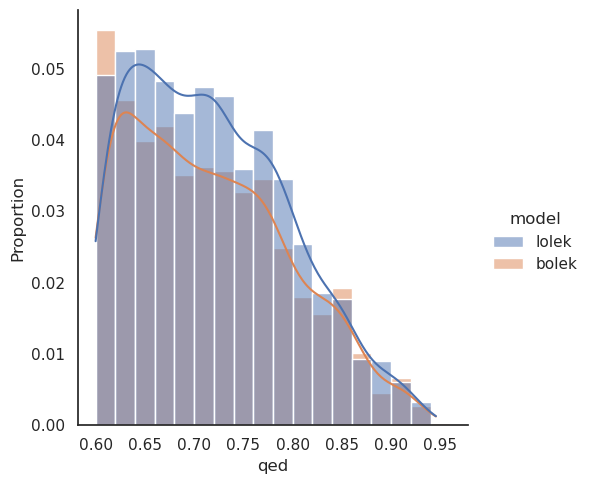

In [134]:
df['qed'] = df['mol'].apply(QED.qed)
sns.displot(df, x='qed', binwidth=0.02, stat='proportion', kde=True, kde_kws={'bw_adjust': 1})

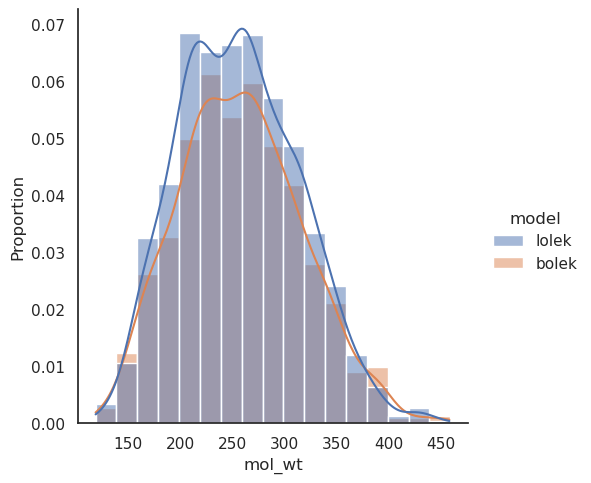

In [135]:
df['mol_wt'] = df['mol'].apply(Chem.rdMolDescriptors.CalcExactMolWt)
sns.displot(df, x='mol_wt', binwidth=20, stat='proportion', kde=True, kde_kws={'bw_adjust': 1})